In [1]:
import pandas as pd
import os
os.getcwd()

'/home/topcuoglu/openrecombinhunt/src/analyse'

In [2]:
virus = "rsv-b"
metadata_path = f"../../data/raw/{virus}/raw_metadata.tsv" 
df = pd.read_csv(metadata_path, sep="\t")
df.head()

,accession,genbank_accession_rev,strain,date,region,country,division,location,host,date_submitted,...,clade,qc.overallScore,qc.overallStatus,missing_data,alignmentScore,alignmentStart,alignmentEnd,genome_coverage,G_coverage,F_coverage
0,PQ737346,PQ737346.1,004-0002,2023-12-28,Europe,France,NaN,NaN,Homo sapiens,2024-12-18,...,B.D.4.1.1,0.0000,good,4.0,44967.0,55.0,15202.0,0.994876,1.000000,1.0
1,PQ737360,PQ737360.1,004-0004,2023-11-25,Europe,France,NaN,NaN,Homo sapiens,2024-12-18,...,B.D.4.1.3,0.0000,good,2.0,44862.0,1.0,15220.0,0.999737,1.000000,1.0
2,PQ737361,PQ737361.1,004-0006,2023-11-26,Europe,France,NaN,NaN,Homo sapiens,2024-12-18,...,B.D.4.1.3,0.0000,good,2.0,44856.0,1.0,15222.0,0.999869,1.000000,1.0
3,OR825324,OR825324.1,RSVA/IRAQ/WASIT/2021/H1,2021-12-02,Asia,Iraq,NaN,NaN,Homo sapiens,2023-12-05,...,B.D,0.0000,good,0.0,1259.0,4911.0,5356.0,0.029300,0.477468,0.0
4,ON057065,ON057065.1,RSVA_CHLA_18-19_028,2019-XX-XX,North America,USA,NaN,NaN,Homo sapiens,2022-07-05,...,B.D.4.1,57.8125,mediocre,0.0,5119.0,5615.0,7435.0,0.119564,0.000000,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   accession              22427 non-null  object 
 1   genbank_accession_rev  22427 non-null  object 
 2   strain                 22427 non-null  object 
 3   date                   22427 non-null  object 
 4   region                 21736 non-null  object 
 5   country                21736 non-null  object 
 6   division               7623 non-null   object 
 7   location               1038 non-null   object 
 8   host                   20979 non-null  object 
 9   date_submitted         22427 non-null  object 
 10  sra_accession          1766 non-null   object 
 11  abbr_authors           22427 non-null  object 
 12  authors                22417 non-null  object 
 13  institution            22395 non-null  object 
 14  clade                  22423 non-null  object 
 15  qc

In [4]:
df.columns

Index(['accession', 'genbank_accession_rev', 'strain', 'date', 'region',
       'country', 'division', 'location', 'host', 'date_submitted',
       'sra_accession', 'abbr_authors', 'authors', 'institution', 'clade',
       'qc.overallScore', 'qc.overallStatus', 'missing_data', 'alignmentScore',
       'alignmentStart', 'alignmentEnd', 'genome_coverage', 'G_coverage',
       'F_coverage'],
      dtype='object')

In [5]:
# display qc.overallScore column
df["qc.overallScore"]

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4        57.812500
           ...    
22422     0.071111
22423     0.000000
22424     0.000000
22425     0.000000
22426     0.000000
Name: qc.overallScore, Length: 22427, dtype: float64

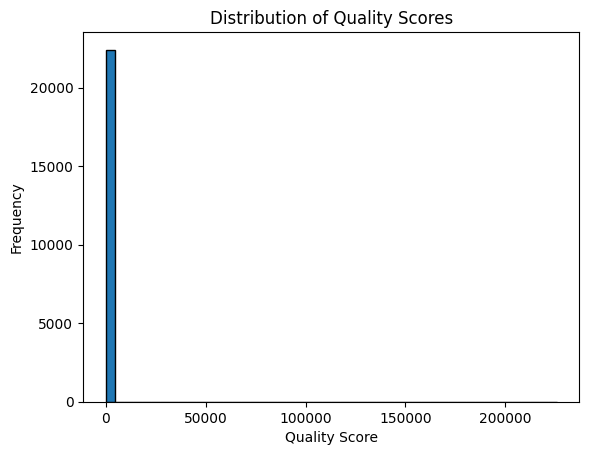

In [6]:
# plot the distribution of qc.overallScore without sns
import matplotlib.pyplot as plt
plt.hist(df["qc.overallScore"], bins=50, edgecolor='black')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Scores')
plt.show()

In [7]:
# count 0 in qc.overallScore
df["qc.overallScore"].value_counts()

qc.overallScore
0.000000        20490
1.562500          637
56.250000         607
6.250000          153
14.062500          67
                ...  
35626.562500        1
39.271111           1
8.217778            1
3.004444            1
17.084444           1
Name: count, Length: 146, dtype: int64

In [8]:
# display qc.overallStatus column
df["qc.overallStatus"]

0            good
1            good
2            good
3            good
4        mediocre
           ...   
22422        good
22423        good
22424        good
22425        good
22426        good
Name: qc.overallStatus, Length: 22427, dtype: object

In [9]:
# count NA in qc.overallStatus
na_count = df["qc.overallStatus"].isna().sum()

# count good in qc.overallStatus
value_counts = df["qc.overallStatus"].value_counts()

print(f"Number of NA in qc.overallStatus: {na_count}")
print("Value counts in qc.overallStatus:")
print(value_counts)

Number of NA in qc.overallStatus: 4
Value counts in qc.overallStatus:
qc.overallStatus
good        21598
mediocre      713
bad           112
Name: count, dtype: int64


In [10]:
# display missing_data column
df["missing_data"]

0        4.0
1        2.0
2        2.0
3        0.0
4        0.0
        ... 
22422    0.0
22423    0.0
22424    0.0
22425    0.0
22426    0.0
Name: missing_data, Length: 22427, dtype: float64

In [11]:
na_count_missing_data = df["missing_data"].isna().sum()
print(f"Number of NA in missing_data: {na_count_missing_data}")

value_counts = df["missing_data"].value_counts()
print("Value counts in missing_data:")
print(value_counts)

Number of NA in missing_data: 4
Value counts in missing_data:
missing_data
0.0       19009
1.0         222
2.0         147
386.0       119
118.0        78
          ...  
1356.0        1
1237.0        1
559.0         1
1543.0        1
3649.0        1
Name: count, Length: 1129, dtype: int64


In [12]:
# display alignmentScore column
df["alignmentScore"]

0        44967.0
1        44862.0
2        44856.0
3         1259.0
4         5119.0
          ...   
22422    43314.0
22423     1195.0
22424     1182.0
22425     1194.0
22426     1250.0
Name: alignmentScore, Length: 22427, dtype: float64

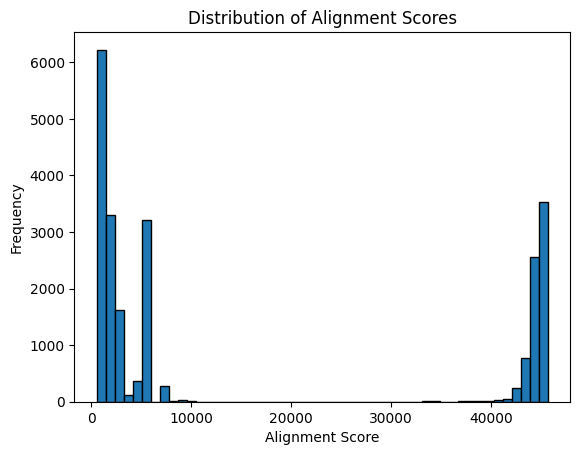

In [13]:
# plot the distribution of alignmentScore 
plt.hist(df["alignmentScore"], bins=50, edgecolor='black')
plt.xlabel('Alignment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment Scores')
plt.show()

In [14]:
# display genome_coverage column
df["genome_coverage"]

0        0.994876
1        0.999737
2        0.999869
3        0.029300
4        0.119564
           ...   
22422    1.000000
22423    0.032190
22424    0.032256
22425    0.032256
22426    0.033833
Name: genome_coverage, Length: 22427, dtype: float64

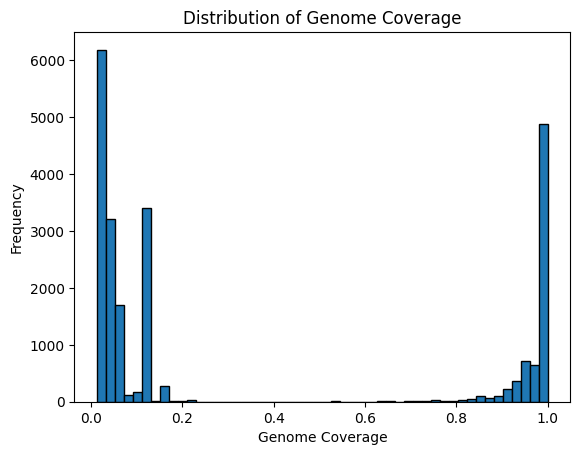

In [15]:
# plot the distribution of genome_coverage
plt.hist(df["genome_coverage"], bins=50, edgecolor='black')
plt.xlabel('Genome Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of Genome Coverage')
plt.show()

In [16]:
# count genome_coverage > 0.9
genome_coverage_count = (df["genome_coverage"] > 0.9).sum()
print(f"Number of genomes with coverage > 0.9: {genome_coverage_count}")

Number of genomes with coverage > 0.9: 6853


In [17]:
# display G_coverage column
df["G_coverage"]

0        1.000000
1        1.000000
2        1.000000
3        0.477468
4        0.000000
           ...   
22422    1.000000
22423    0.465665
22424    0.410944
22425    0.454936
22426    0.465665
Name: G_coverage, Length: 22427, dtype: float64

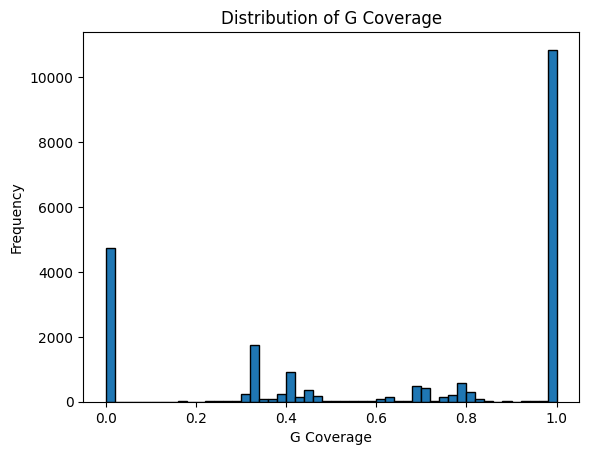

In [18]:
# plot the distribution of G_coverage
plt.hist(df["G_coverage"], bins=50, edgecolor='black')
plt.xlabel('G Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of G Coverage')
plt.show()

In [19]:
# display F_coverage column
df["F_coverage"]

0        1.00000
1        1.00000
2        1.00000
3        0.00000
4        1.00000
          ...   
22422    1.00000
22423    0.00000
22424    0.00522
22425    0.00000
22426    0.00000
Name: F_coverage, Length: 22427, dtype: float64

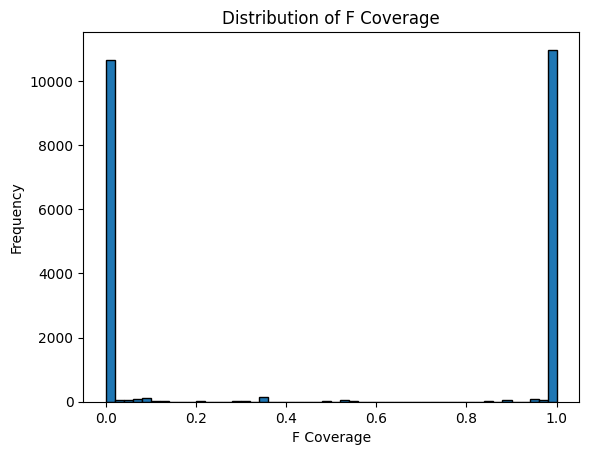

In [20]:
# plot the distribution of F_coverage
plt.hist(df["F_coverage"], bins=50, edgecolor='black')
plt.xlabel('F Coverage')
plt.ylabel('Frequency')
plt.title('Distribution of F Coverage')
plt.show()

In [21]:
# count G_coverage > 0.98
G_coverage_count = (df["G_coverage"] > 0.98).sum()

# count F_coverage > 0.98
F_coverage_count = (df["F_coverage"] > 0.98).sum()

# count both G_coverage and F_coverage > 0.98
both_coverage_count = ((df["G_coverage"] > 0.98) & (df["F_coverage"] > 0.98)).sum()

print(f"Number of genomes with G_coverage > 0.98: {G_coverage_count}")
print(f"Number of genomes with F_coverage > 0.98: {F_coverage_count}")
print(f"Number of genomes with both G_coverage and F_coverage > 0.98: {both_coverage_count}")

Number of genomes with G_coverage > 0.98: 10852
Number of genomes with F_coverage > 0.98: 10979
Number of genomes with both G_coverage and F_coverage > 0.98: 7288


In [22]:
# display clade column
df["clade"]

0        B.D.4.1.1
1        B.D.4.1.3
2        B.D.4.1.3
3              B.D
4          B.D.4.1
           ...    
22422          B.2
22423            B
22424            B
22425            B
22426            B
Name: clade, Length: 22427, dtype: object

In [23]:
# count NA in clade column
na_clade_count = df["clade"].isna().sum()
print(f"Number of NA in clade column: {na_clade_count}")

Number of NA in clade column: 4


In [24]:
# count unique values in clade column
unique_clades = df["clade"].nunique()
print(f"Number of unique clades: {unique_clades}")

Number of unique clades: 26


In [25]:
# display date column
df["date"]

0        2023-12-28
1        2023-11-25
2        2023-11-26
3        2021-12-02
4        2019-XX-XX
            ...    
22422    XXXX-XX-XX
22423    XXXX-XX-XX
22424    XXXX-XX-XX
22425    XXXX-XX-XX
22426    XXXX-XX-XX
Name: date, Length: 22427, dtype: object

In [26]:
# count NA in date column
na_date_count = df["date"].isna().sum()

# count dates starting with XXXX
date_starts_with_xxxx_count = df["date"].str.startswith("XXXX").sum()

print(f"Number of NA in date column: {na_date_count}")
print(f"Number of dates starting with 'XXXX': {date_starts_with_xxxx_count}")

Number of NA in date column: 0
Number of dates starting with 'XXXX': 1539


In [27]:
# rows with date matching r'\d{4}-\d{2}-\d{2}'
date_pattern_count = df["date"].str.fullmatch(r'\d{4}-\d{2}-\d{2}').sum()
print(f"Number of rows with date matching 'YYYY-MM-DD': {date_pattern_count}")

# rows with date matching r'\d{4}-\d{2}'
date_pattern_count_2 = df["date"].str.fullmatch(r'\d{4}-\d{2}').sum()
print(f"Number of rows with date matching 'YYYY-MM': {date_pattern_count_2}")

# rows with date matching r'\d{4}'
date_pattern_count_3 = df["date"].str.fullmatch(r'\d{4}').sum()
print(f"Number of rows with date matching 'YYYY': {date_pattern_count_3}")

# total rows
total_rows = len(df)
print(f"Total number of rows: {total_rows}")

# display 5 sequences that do not match any of the date patterns
non_matching_dates = df[~df["date"].str.fullmatch(r'\d{4}-\d{2}-\d{2}') & 
                        ~df["date"].str.fullmatch(r'\d{4}-\d{2}') & 
                        ~df["date"].str.fullmatch(r'\d{4}') &
                        ~df["date"].str.startswith("XXXX") &
                        df["date"].notna()
                        ].head(5)
print("5 sequences with non-matching dates:")
print(non_matching_dates[["date", "accession"]])

Number of rows with date matching 'YYYY-MM-DD': 15146
Number of rows with date matching 'YYYY-MM': 0
Number of rows with date matching 'YYYY': 0
Total number of rows: 22427
5 sequences with non-matching dates:
          date accession
4   2019-XX-XX  ON057065
5   2019-XX-XX  ON057070
15  2021-12-XX  PP024855
16  2021-12-XX  PP024854
17  2021-12-XX  PP024856


In [28]:
# display date_submitted column
df["date_submitted"]

0        2024-12-18
1        2024-12-18
2        2024-12-18
3        2023-12-05
4        2022-07-05
            ...    
22422    1997-11-02
22423    2000-04-20
22424    2000-04-20
22425    2000-04-20
22426    2000-04-20
Name: date_submitted, Length: 22427, dtype: object

In [2]:
#########
# DEBUG #
import pandas as pd

# load change_probability.parquet
# from environments/rsv-b/dist5size50/

change_prob_path = "../../environments/rsv-b/dist5size50/change_probability.parquet"
change_prob_df = pd.read_parquet(change_prob_path)
change_prob_df.head()

,probability,pos
6_A|G,0.000058,6
10_A|G,0.000058,10
10,0.000116,10
11_A|T,0.000058,11
12_T|C,0.000116,12


In [3]:
# check type of each column in change_prob_df
change_prob_types = change_prob_df.dtypes
print("Data types of each column in change_prob_df:")
print(change_prob_types)

Data types of each column in change_prob_df:
probability    float64
pos              int64
dtype: object


In [4]:
# load change2lineage_probability.parquet
# from environments/rsv-b/dist5size50/

change2lineage_prob_path = "../../environments/rsv-b/dist5size50/change2lineage_probability.parquet"
change2lineage_prob_df = pd.read_parquet(change2lineage_prob_path)
change2lineage_prob_df.head()

,B,B.3,B.D,B.D.1,B.D.1.1,B.D.1.NmC1,B.D.2,B.D.3,B.D.4,B.D.4.1,...,B.D.4.1.3.NmC1,B.D.4.NmC1,B.D.E.1,B.D.E.1.1,B.D.E.1.2,B.D.E.2,B.D.E.4,B.D.E.5,B.D.NmC1,pos
6_A|G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001401,0.0,0.0,0.0,0.0,0.00000,0.0,6.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,10.0
10_A|G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001401,0.0,0.0,0.0,0.0,0.00000,0.0,10.0
11_A|T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00361,0.0,11.0
12_T|C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002801,0.0,0.0,0.0,0.0,0.00000,0.0,12.0


In [5]:
# check type of each column in change2lineage_prob_df
change2lineage_prob_types = change2lineage_prob_df.dtypes
print("Data types of each column in change2lineage_prob_df:")
print(change2lineage_prob_types)

Data types of each column in change2lineage_prob_df:
B                 float64
B.3               float64
B.D               float64
B.D.1             float64
B.D.1.1           float64
B.D.1.NmC1        float64
B.D.2             float64
B.D.3             float64
B.D.4             float64
B.D.4.1           float64
B.D.4.1.1         float64
B.D.4.1.1.NmC1    float64
B.D.4.1.2         float64
B.D.4.1.3.NmC1    float64
B.D.4.NmC1        float64
B.D.E.1           float64
B.D.E.1.1         float64
B.D.E.1.2         float64
B.D.E.2           float64
B.D.E.4           float64
B.D.E.5           float64
B.D.NmC1          float64
pos               float64
dtype: object


In [6]:
# does pos column have any NA values?
pos_na_count = change2lineage_prob_df["pos"].isna().sum()
print(f"Number of NA values in 'pos' column: {pos_na_count}")

Number of NA values in 'pos' column: 1


In [7]:
# what is the index column of that NA valued row?
na_index = change2lineage_prob_df[change2lineage_prob_df["pos"].isna()].index
if not na_index.empty:
    print(f"Index of the row with NA in 'pos' column: {na_index[0]}")


Index of the row with NA in 'pos' column: nan


In [8]:
# does index have any NA values?
index_na_count = change2lineage_prob_df.index.isna().sum()
print(f"Number of NA values in index: {index_na_count}")

Number of NA values in index: 0


In [10]:
# does index column have any string "nan" values?
index_nan_count = change2lineage_prob_df.index.astype(str).str.contains("nan").sum()
print(f"Number of 'nan' strings in index: {index_nan_count}")


Number of 'nan' strings in index: 1


In [11]:
# load haplocov_reformatted.tsv
# from results/haplocov_output/rsv-b/dist5size50/
haplocov_path = "../../results/haplocov_output/rsv-b/dist5size50/haplocov_reformatted.tsv"
haplocov_df = pd.read_csv(haplocov_path, sep="\t")
haplocov_df.head()

,genomeID,collectionD,offsetCD,depositionD,offsetDD,continent,area,country,region,pangoLin,alt,mutations
0,KP862434,2010-05-30,-3497.0,2015-05-19,-1683.0,Africa,AfrEast,Kenya,NaN,B.D.3,no,"5052_C|T,5101_A|T,5532_C|T,5247_T|C,5073_C|T,5..."
1,JX079975,2010-06-01,-3496.0,2012-08-08,-2698.0,Asia,AsiaSE,Vietnam,NaN,B.D.4,no,"5402_C|A,5484_C|T,5488_C|T,5571_TAC|GCT,5544_G..."
2,JX079976,2010-06-01,-3496.0,2012-08-08,-2698.0,Asia,AsiaSE,Vietnam,NaN,B.D.4.NmC1,no,"5550_T|C,5461_.|GCCTTACACAACCACATCAA,5581_C|T,..."
3,JX678722,2010-05-31,-3496.0,2012-12-10,-2575.0,SouthAmerica,SAM,Brazil,NaN,B.D.4,no,"5355_GA|AC,5488_C|T,5402_C|A,5550_T|C,5461_.|C..."
4,MW260595,2010-05-31,-3496.0,2021-02-03,398.0,Asia,AsiaEast,China,NaN,B.D.3,no,"5127_G|A,4699_C|A,4749_C|T,5073_C|T,5286_C|T,4..."


In [12]:
# get mutations column and check each row if any of them contains "nan" string
contains_nan_count = haplocov_df["mutations"].apply(lambda x: "nan" in str(x)).sum()
print(f"Number of rows in 'mutations' column containing 'nan': {contains_nan_count}")

Number of rows in 'mutations' column containing 'nan': 1


In [13]:
# return the row that contains "nan" in mutations column
nan_rows = haplocov_df[haplocov_df["mutations"].apply(lambda x: "nan" in str(x))]
if not nan_rows.empty:
    print("Rows containing 'nan' in 'mutations' column:")
    print(nan_rows)

Rows containing 'nan' in 'mutations' column:
     genomeID collectionD  offsetCD depositionD  offsetDD continent    area  \
892  KY078406  2012-01-01   -2918.0  2017-12-01    -759.0      Asia  AsiaSO   

    country  region pangoLin  alt mutations  
892   India     NaN    B.D.2  NaN       NaN  
